## Quarta Lista de Exercícios - OTIMIZACAO NAO LINEAR
**Nome: $\color{red}{\text{Antonio Carlos da Anunciação}}$**

**Matricula: 2018019443**

**Professor: Frederico Gadelha**

**Chapter 6: Read Sections 6.1, 6.9 and 6.11**


---

In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Problem 6.8
Plot the contours of the following function over the region, (−5 ≤ x1 ≤ 5,−3 ≤ x2 ≤ 6) and identify the optimum point:
$$f(x_1, x_2) = {(x_1+2x_2-7)}^{2}+{(2x_1+x_2-5)}^{2}$$

In [2]:
def f1(x1, x2):
    return ((x1+2*x2-7)**2)+((2*x1+x2-5)**2)

def df1(x1, x2):
    return np.vstack((2*(x1+2*x2-7), 2*(2*x1+x2-5)))

In [3]:
a1 = np.linspace(-5, 5, 50)
a2 = np.linspace(-3, 6, 50)
A1, A2 = np.meshgrid(a1, a2)
Z1 = f1(A1, A2)

Gradient of f(x1, x2):
\begin{equation}
\begin{bmatrix}
10 & 8\\
8 & 10\\
\end{bmatrix} x 
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix} = 
\begin{bmatrix}
34\\
38\\
\end{bmatrix}
\end{equation}

Hessian Matrix:
\begin{equation}
H(X) = 
\begin{bmatrix}
10 & 8\\
10 & 8\\
\end{bmatrix}
\end{equation}

In [4]:
X1 = np.dot(np.linalg.inv(np.array([[10, 8], [8, 10]])),np.array([[34], [38]]))

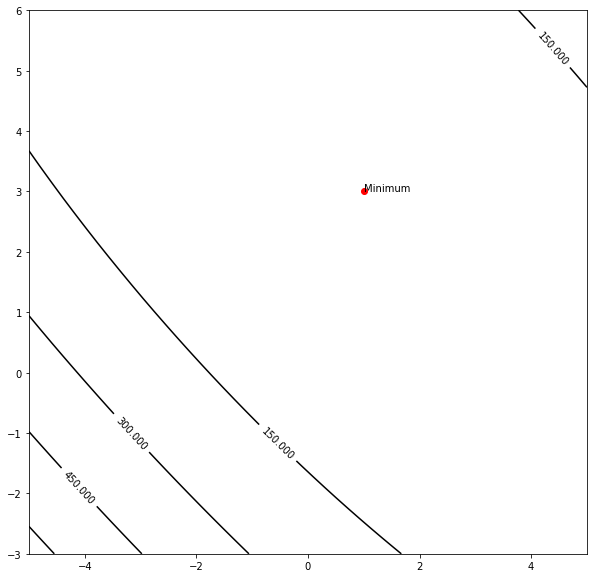

In [5]:
plt.figure(figsize=(10,10))
contours = plt.contour(A1, A2, Z1, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.scatter(X1[0], X1[1], color='red')
plt.annotate("Minimum", X1, fontsize=10)
plt.show()

---
#### Problem 6.9:
Plot the contours of the following function in the two dimensional (x1, x2) space over the region (−4 ≤ x1 ≤ 4,−3 ≤ x2 ≤ 6) and identify the optimum point:
$$f(x_1, x_2) = {2(x_2-x_1^2)}^{2}+{(1-x_1)}^{2}$$

In [6]:
def f2(x1,x2):
    return 2*(x2-x1**2)**2+(1-x1)**2

def gradf2(x1,x2):
    return np.vstack((-8*(x1*x2-x1**3)-2*(1-x1), 2*(x2-x1**2)))

In [7]:
b1 = np.linspace(-4, 4, 50)
b2 = np.linspace(-3, 6, 50)
B1, B2 = np.meshgrid(b1, b2)
Z2 = f2(B1, B2)

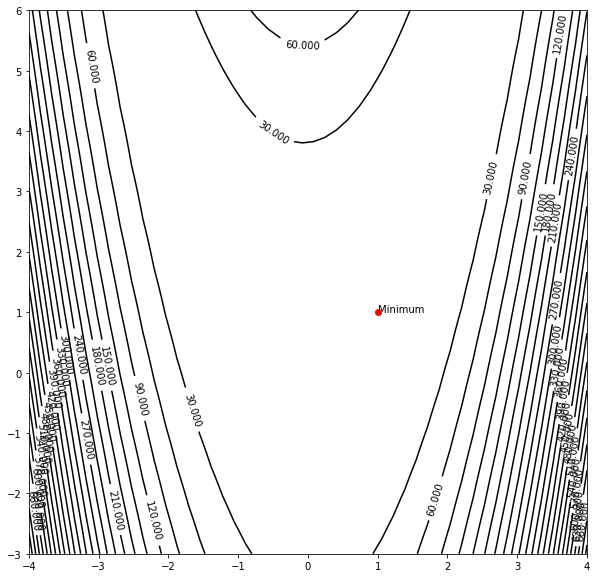

In [8]:
plt.figure(figsize=(10,10))
contours = plt.contour(B1, B2, Z2, 25, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.scatter(1, 1, color='red')
plt.annotate("Minimum", [1,1], fontsize=10)
plt.show()

---
#### Problem 6.20
Perform two iterations of the Newton’s method to minimize the function:
$$f(x_1, x_2) = {100(x_2-x_1^2)}^{2}+{(1-x_1)}^{2}$$
from the starting point (-1.2, 1.0)

In [9]:
def f3(x1, x2):
    return 100*(x2-x1**2)**2+(1-x1)**2

def F620(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

def gradF620(x):
    return np.array([[-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0])], [200*(x[1]-x[0]**2)]])

def hessianF620(x):
    return np.array([[-400*x[1]+1200*x[0]**2+2, -400*x[0]], [-400*x[0], 200]])

def newtonMethod(start, function, gradFunction, hessianFunction, maxiter, tol = 0.001):
    x1, iteration, erro = start, 0, 10**10
    historic = []
    
    while iteration < (maxiter+1):
        print("Iteracao:", iteration, "Erro:", erro)
        x1 = np.reshape(x1, start.shape)
        historic.append(x1)
        g = gradFunction(x1)
        j_inv = np.linalg.inv(hessianFunction(x1))
        x2 = x1 - np.transpose(np.dot(j_inv, g))
        erro = 0.5*np.sqrt(np.sum(x2-x1)**2)
        x1 = x2
        x2 = np.reshape(x2, start.shape)
        iteration = iteration + 1
        if erro < tol:
            print("Erro final:", erro)
            break
        
    return x2, historic

In [10]:
x0 = np.array([-1.2, 1])
Xmin, historic = newtonMethod(x0, F620, gradF620, hessianF620, 2, 0.00001)
print("xmin:", Xmin, "f(xmin):", F620(Xmin))

Iteracao: 0 Erro: 10000000000
Iteracao: 1 Erro: 0.20269662921348286
Iteracao: 2 Erro: 1.3086561209990717
xmin: [0.76342968 0.58282478] f(xmin): 0.0559655168340664


In [11]:
c1 = np.linspace(-5, 5, 50)
c2 = np.linspace(-5, 5, 50)
C1, C2 = np.meshgrid(c1, c2)
Z3 = f3(C1, C2)

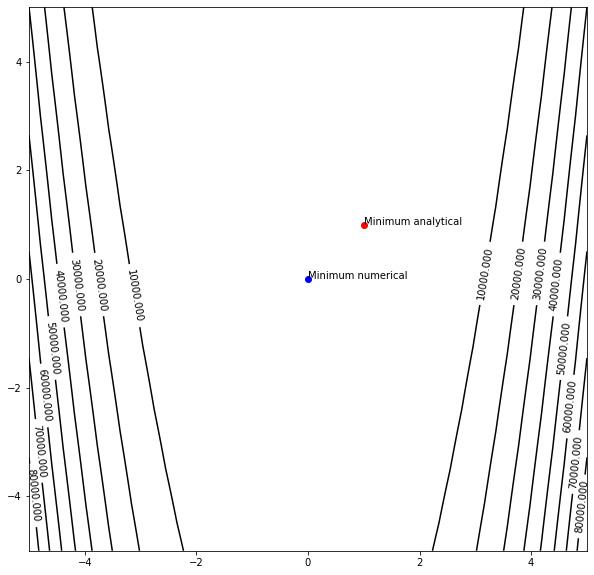

In [28]:
plt.figure(figsize=(10,10))
contours = plt.contour(C1, C2, Z3, 10, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
for i in range(1, len(historic)-1):
    plt.plot([historic[i][0], historic[i+1][0]], [historic[i][1], historic[i+1][1]], 'ro--')
    plt.annotate("step"+str(i), historic[i], fontsize=10)  
plt.scatter(1, 1, color='red')
plt.annotate("Minimum analytical", [1,1], fontsize=10)
plt.scatter(Xmin[0], Xmin[1], color='blue')
plt.annotate("Minimum numerical", [Xmin[0],Xmin[1]], fontsize=10)
plt.show()

---
#### Problem 6.33
Compare the gradients of the function:
$$f(x_1, x_2) = {100(x_2-x_1^2)}^{2}+{(1-x_1)}^{2}$$

at X = (0.5, 0.5), given by the following methods:

Use a perturbation of 0.005 for x1 and x2 in the finite-difference methods.

In [13]:
def F633(x1, x2):
    return 100*(x2-x1**2)**2+(1-x1)**2

def gradF633(x1, x2):
    return 400*(x1**3-x1*x2)+2*(x1-1), 200*(x2-x1**2)

In [14]:
gradF633(0.5,0.5)

(-51.0, 50.0)

(a) Analytical differentiation

$$\nabla f(x_1, x_2) = [{400(x_1^3-x_1x_2)}, 200{(x_2-x_1^2)}]$$
$$\nabla f(0.5, 0.5) = [{400(0.5^3-0.5 \times 0.5)}, 200{(0.5-0.5^2)}]$$
$$\nabla f(0.5, 0.5) = [-51.0, 50.0]$$

(b) Central difference method

In [15]:
def difCentral(x1, x2, function, delta1, delta2):
    fx1, fx2 = (function(x1+delta1, x2)-function(x1-delta1, x2))/(2*delta1), (
        function(x1, x2+delta2)-function(x1, x2-delta2))/(2*delta2)
    return fx1, fx2

In [16]:
difCgradx1, difCgradx2 = difCentral(0.5, 0.5, F633, 0.005, 0.005)
print("Central Difference:", format(difCgradx1,'.4f'),", ", format(difCgradx2,'.4f'))

Central Difference: -50.9950 ,  50.0000


(c) Forward difference method

In [17]:
def difForward(x1, x2, function, delta1, delta2):
    fx1, fx2 = (function(x1+delta1, x2)-function(x1, x2))/(delta1), (
        function(x1, x2+delta2)-function(x1, x2))/(delta2)
    return fx1, fx2

In [18]:
difFgradx1, difFgradx2 = difForward(0.5, 0.5, F633, 0.005, 0.005)
print("Forward Difference:", format(difFgradx1,'.4f'),", ", format(difFgradx2,'.4f'))

Forward Difference: -50.7400 ,  50.5000


(d) Backward difference method

In [19]:
def difBackward(x1, x2, function, delta1, delta2):
    fx1, fx2 = (function(x1, x2)-function(x1-delta1, x2))/(delta1), (
        function(x1, x2)-function(x1, x2-delta2))/(delta2)
    return fx1, fx2

In [20]:
difBgradx1, difBgradx2 = difBackward(0.5, 0.5, F633, 0.005, 0.005)
print("Backward Difference:", format(difBgradx1,'.4f'),", ", format(difBgradx2,'.4f'))

Backward Difference: -51.2500 ,  49.5000


---
#### Problem 6.43
Minimize
$$f(x_1, x_2) = {2x_1^2+x_2^2}$$

by using the steepest descent method with the starting point (1, 2) (two iterations only).

To steepest descent we have:
$$X_{i+1} = X_{i}- \lambda^* \nabla f(X_i)$$

with:
$$\lambda^* = argmin [f(X_i+\lambda \nabla f(X_i)]$$


In [21]:
def F643(x):
    return 2*x[0]**2+x[1]**2

def gradF643(x):
    return np.array([[4*x[0]], [2*x[1]]])

def lambd(x, gradF):
    lamb = (2*x[0]*gradF(x)[0]+x[1]*gradF(x)[1])/(2*gradF(x)[0]**2+gradF(x)[1]**2)
    return lamb

def steepestDescent(x, gradFunction, lambdaFunction, itermax, tol = 0.001):
    x1, x2, iteration, erro = x, 0, 0, 10**10
    
    while iteration < itermax+1:
        x1 = np.reshape(x1, x.shape)
        lamb = lambdaFunction(x1, gradFunction)
        historic.append(x1)
        x2 = x1-np.transpose(lamb*gradFunction(x1))
        erro = 0.5*np.sqrt(np.sum(x2-x1)**2)
        x1 = x2
        x2 = np.reshape(x2, x.shape)
        print("Minimun step", iteration+1, ":", x2)
        
        if erro < tol:
            print("Erro final:", erro)
            break
        iteration = iteration + 1
        
    return x2, historic

In [22]:
x, tol = np.array([1,2]), 10**(-3)
xmin, hist = steepestDescent(x, gradF643, lambd, 2)

Minimun step 1 : [-0.33333333  0.66666667]
Minimun step 2 : [0.11111111 0.22222222]
Erro final: 5.551115123125783e-17


---
#### Problem 6.44
Minimize
$$f(x_1, x_2, x_3) = {x_1^2+3x_2^2+6x_3^2}$$

by the Newton’s method using the starting point as (2,−1, 1).

In [23]:
def f4(x):
    return (x[0]**2+3*x[1]**2+6*x[2]**2)

def gradf4(x):
    return (np.vstack((2*x[0], 6*x[1], 12*x[2])))

def F644(x):
    return (x[0]**2+3*x[1]**2+6*x[2]**2)

def gradF644(x):
    return np.array([[2*x[0]], [6*x[1]], [12*x[2]]])

def hessianF644(x):
    return np.array([[2, 0, 0], [0, 6, 0], [0, 0, 12]])

In [24]:
x0 = np.array([2, -1, 1])
Xmin, historic = newtonMethod(x0, F644, gradF644, hessianF644, 10, 0.01)
print("xmin:", Xmin, "f(xmin):", F644(Xmin))

Iteracao: 0 Erro: 10000000000
Iteracao: 1 Erro: 1.0
Erro final: 0.0
xmin: [0. 0. 0.] f(xmin): 0.0


#### ---
#### Problem 6.47
Solve the following system of equations using Newton’s method of unconstrained minimization with the starting point **X** = (0,0,0)

\begin{equation}
\begin{bmatrix}
2 & -1 & 1\\
1 & 2 & 0\\
3 & 1 & 2\
\end{bmatrix} 
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix} = 
\begin{bmatrix}
-1\\
0\\
3\\
\end{bmatrix}
\end{equation}

In [25]:
def F647(x):
    return 14*x[0]**2+6*x[1]*2+5*x[2]**2+6*x[0]*x[1]+2*x[1]*x[
        2]+16*x[0]*x[2]-14*x[0]-8*x[1]-10*x[2]+10

def gradF647(x):
    return np.array([[28*x[0]+6*x[1]+16*x[2]-14], [6*x[0]+12*x[
        1]+2*x[2]-8], [16*x[0]+2*x[1]+10*x[2]-10]])

def hessianF647(x):
    return np.array([[28, 6, 16],[6, 12, 2], [16, 2, 10]])

In [26]:
x0 = np.array([0, 0, 0])
X, historic = newtonMethod(x0, F647, gradF647, hessianF647, 10, 0.01)
print("Final solution:", X)

Iteracao: 0 Erro: 10000000000
Iteracao: 1 Erro: 1.499999999999999
Erro final: 4.440892098500626e-16
Final solution: [-2.  1.  4.]


---
### References:
#### 1. Engineering Optimization Theory and Practice, 4th, Singiresu S. Rao
---